In [1]:
import pandas as pd
import gym
import gym.spaces
import rocket_lander_gym
import matplotlib.pyplot as plt
import seaborn as sns

def get_rcs_action(observation): #reaction_control_system
    """
    Функция возвращает действие для пшикалки, 
    динамически подстраиваясь под угол и угловую скорость
    """
    angle = observation[2]
    angle_vel = observation[-1]
    
    angle_lim = abs(angle_vel)/2
    
    if (angle<angle_lim) & (angle>0):
        if angle_vel>0:
            #слева от нуля, вращение влево | отр. пшикалка
            action = -angle*angle_vel*10 
        else:
            #слева от нуля, вращение вправо | пол. пшикалка
            action = -angle*angle_vel*10 
    elif (angle>-angle_lim) & (angle<0):
        if angle_vel>0:
            #справа от нуля, вращение влево | отр. пшикалка
            action = angle*angle_vel*10
        else:
            #справа от нуля, вращение вправо | положительная пшикалка
            action = angle*angle_vel*10
    else:
        action = -angle*10
    return action

def get_engine_angle(observation):
    return observation[-1]*1.5

def get_engine_burn(observation):
    y = observation[1]
    return .6 if y>0 else 4

env = gym.make('RocketLander-v0')
env.reset()
episodes = 100
observations = []
rewards = []

PRINT_DEBUG_MSG = True
observation = [0]*10
angle_speed = 0

for i in range(1000):
    env.render()
    
    rcs_action = get_rcs_action(observation)
    engine_angle = get_engine_angle(observation)
    engine_burn = get_engine_burn(observation)
    action = [engine_angle, engine_burn, rcs_action]
    
    observation,reward,done,info =env.step(action)
    observations.append(observation)
    rewards.append(reward)
    
    if PRINT_DEBUG_MSG:
        print("Action Taken  ",action)
        print("Observation   ",observation)
        print("Reward Gained ",reward)
        print("Info          ",info,end='\n\n')

    if done:
        print("Simulation done.")
        break
    
    
env.close()

Action Taken   [0.0, 4, 0]
Observation    [-1.24439401  1.79464757  0.28542283 -0.05004346 -0.05004346 -1.19666905
  0.06859943  0.26489647 -0.50732609  2.85638198]
Reward Gained  -0.0024014347128591554
Info           {}

Action Taken   [4.2845729660355225, 0.6, -8.152766280350946]
Observation    [-1.24112152  1.78286973  0.33401819 -0.05004346 -0.05004346 -1.18548871
  0.16044921  0.26804453 -0.50743779  2.83173893]
Reward Gained  -0.00408892636512601
Info           {}

Action Taken   [4.247608401100386, 0.6, -9.458523206006737]
Observation    [-1.23786751  1.77110444  0.38216049 -0.05004346 -0.05004346 -1.17430837
  0.25150656  0.27069827 -0.50750542  2.80515455]
Reward Gained  -0.004103402380569253
Info           {}

Action Taken   [4.207731828334331, 0.6, -10.720192430329059]
Observation    [-1.23463628  1.75935197  0.42981337 -0.05004346 -0.05004346 -1.16312803
  0.34170907  0.27285506 -0.50753354  2.77660224]
Reward Gained  -0.0041184063524199776
Info           {}

Action Taken  

Action Taken   [0.28142841869181046, 0.6, -15.47391188209203]
Observation    [-1.16284792e+00  1.29233798e+00  1.54912070e+00 -5.00434594e-02
 -5.00434594e-02 -7.15914431e-01  2.52130683e+00  1.61015014e-03
 -5.00467176e-01  9.37465500e-02]
Reward Gained  -0.0044394860325238416
Info           {}

Action Taken   [0.1406198249744807, 0.6, -15.491206964096111]
Observation    [-1.16321789e+00  1.28055111e+00  1.54923528e+00 -5.00434594e-02
 -5.00434594e-02 -7.04734091e-01  2.52432135e+00 -1.12310978e-02
 -5.00031370e-01 -5.73012440e-04]
Reward Gained  -0.0044345770006536155
Info           {}

Action Taken   [-0.0008595186602719268, 0.6, -15.492352789648416]
Observation    [-1.16371494  1.26875346  1.54772972 -0.05004346 -0.05004346 -0.69355375
  2.52430292 -0.0241641  -0.49954617 -0.09524965]
Reward Gained  -0.004429333291659153
Info           {}

Action Taken   [-0.1428744768743808, 0.6, -15.477297174833282]
Observation    [-1.16433986  1.25694502  1.54459746 -0.05004346 -0.05004346 -0.68

Action Taken   [-3.4954680953494246, 0.6, 13.248031978875943]
Observation    [-1.26320165  0.83167001  0.52880629 -0.05004346 -0.05004346 -0.27988118
  0.67336026 -0.47693369 -0.40601505 -2.32665835]
Reward Gained  -0.004472455303071475
Info           {}

Action Taken   [-3.4899875273201664, 0.6, 12.30351566596985]
Observation    [-1.26733202  0.82012626  0.48920439 -0.05004346 -0.05004346 -0.26870084
  0.59854427 -0.48592709 -0.40104375 -2.32077164]
Reward Gained  -0.004485142951765252
Info           {}

Action Taken   [-3.4811574530120635, 0.6, 11.353316638422115]
Observation    [-1.2714834   0.80860759  0.44974113 -0.05004346 -0.05004346 -0.2575205
  0.52391757 -0.49431344 -0.3959881  -2.31262359]
Reward Gained  -0.004497614986119757
Info           {}

Action Taken   [-3.468935387401634, 0.6, 10.400819540730552]
Observation    [-1.27565094  0.79711428  0.41045819 -0.05004346 -0.05004346 -0.24634016
  0.44955288 -0.5020876  -0.39085227 -2.30218849]
Reward Gained  -0.00450984500757143

Action Taken   [-0.9529114069654242, 0.6, 5.458510065568579]
Observation    [-1.39870835  0.40971391 -0.55521291 -0.05004346 -0.05004346  0.14497174
 -1.42887182 -0.4093706  -0.18500327 -0.55416377]
Reward Gained  -0.004423459790031091
Info           {}

Action Taken   [-0.8312456506716562, 0.6, 5.552129120553636]
Observation    [-1.40076449  0.39898714 -0.5631704  -0.05004346 -0.05004346  0.15615208
 -1.4466915  -0.39907493 -0.17867553 -0.47212086]
Reward Gained  -0.004400370979061295
Info           {}

Action Taken   [-0.7081812938911033, 0.6, 5.631704040450441]
Observation    [-1.40270813  0.38827495 -0.56970938 -0.05004346 -0.05004346  0.16733242
 -1.46187301 -0.38858075 -0.17231018 -0.3892442 ]
Reward Gained  -0.004376271905892713
Info           {}

Action Taken   [-0.5838663045013528, 0.6, 5.697093817657111]
Observation    [-1.40453793  0.37757733 -0.57481641 -0.05004346 -0.05004346  0.17851276
 -1.47438954 -0.37791275 -0.16590379 -0.30563376]
Reward Gained  -0.004351186880666135

Action Taken   [2.0090548387338076, 0.6, -1.1244269173846964]
Observation    [-1.40476407  0.01581842 -0.06081764 -0.05004346 -0.05004346  0.56982466
 -0.57004516  0.07069421  0.11331375  1.34417135]
Reward Gained  -0.0035835635562676315
Info           {}

Action Taken   [2.016257023153582, 0.6, -0.8174932592666085]
Observation    [-1.40353351  0.00599112 -0.03763184 -0.05004346 -0.05004346  0.581005
 -0.526822    0.08057207  0.1230147   1.34723092]
Reward Gained  -0.003577379497483023
Info           {}

Action Taken   [2.020846378629175, 0.6, -0.5069877582077507]
Observation    [-1.40227102 -0.00380177 -0.01442385 -0.05004346 -0.05004346  0.59218534
 -0.48350047  0.08997222  0.13279298  1.34852763]
Reward Gained  -0.00357197217704328
Info           {}

Action Taken   [2.0227914467844195, 4, -0.19450955646350507]
Observation    [-1.40096981 -0.01355969  0.00917336 -0.05004346 -0.05004346  0.66672094
 -0.44013723  0.09505115  0.14293165  1.37125096]
Reward Gained  -0.0018628427861670108

Action Taken   [0.4236643247450488, 4, -6.1343336049889725]
Observation    [-1.36296685 -0.33866978  0.61744322 -0.05004346 -0.05004346  0.96486333
  0.7309049   0.09521611  0.56227659  0.22697363]
Reward Gained  -0.0038118468075088773
Info           {}

Action Taken   [0.34046044669016684, 4, -6.174432225413185]
Observation    [-1.36284911 -0.3470172   0.6204964  -0.05004346 -0.05004346  0.96486333
  0.73820346  0.0895085   0.57375231  0.17113782]
Reward Gained  -0.0038289682468933594
Info           {}

Action Taken   [0.256706736217828, 4, -6.204963979682926]
Observation    [-1.36280415 -0.3553305   0.62258947 -0.05004346 -0.05004346  0.96486333
  0.74370657  0.08372916  0.58522309  0.11502554]
Reward Gained  -0.0038459436937293466
Info           {}

Action Taken   [0.17253831029679903, 4, -6.225894726193806]
Observation    [-1.36283198 -0.36360942  0.62371953 -0.05004346 -0.05004346  0.96486333
  0.74740533  0.07790102  0.59669045  0.05872555]
Reward Gained  -0.0038627403948935145
I

Action Taken   [-1.1051549481279215, 4, 1.7011156206681377]
Observation    [-1.40059595 -0.63757483  0.21884266 -0.05004346 -0.05004346  0.96486333
  0.00319056 -0.12286999  1.01830029 -0.71095237]
Reward Gained  -0.004271321751847278
Info           {}

Action Taken   [-1.0664285519708825, 4, 1.5558670694152557]
Observation    [-1.40199856 -0.64447232  0.20725832 -0.05004346 -0.05004346  0.96486333
 -0.01967081 -0.12681028  1.03023176 -0.68402702]
Reward Gained  -0.004274794016352977
Info           {}

Action Taken   [-1.026040537357254, 4, 1.417702892221973]
Observation    [-1.4033854  -0.65133082  0.19615285 -0.05004346 -0.05004346  0.96486333
 -0.04166637 -0.13046941  1.04216077 -0.65603561]
Reward Gained  -0.004277679669513622
Info           {}

Action Taken   [-0.9840534156479235, 4, 1.2868325698458472]
Observation    [-1.40475492 -0.65815054  0.18554408 -0.05004346 -0.05004346  0.96486333
 -0.06276185 -0.13385895  1.0540873  -0.62702007]
Reward Gained  -0.00428006411968782
Info  

Action Taken   [0.012323696495828165, 4, -0.4716999489204219]
Observation    [-1.43727317 -0.87824838  0.04778384 -0.05004346 -0.05004346  0.96486333
 -0.35102831 -0.03235975  1.48247246  0.02859644]
Reward Gained  -0.0025554121140897315
Info           {}

Action Taken   [0.0428946581197911, 4, -0.477838359573611]
Observation    [-1.43764878 -0.88366111  0.04874532 -0.05004346 -0.05004346  0.96486333
 -0.35010876 -0.02818657  1.49434732  0.04893189]
Reward Gained  -0.002551547586861173
Info           {}

Action Taken   [0.07339783069298604, 4, -0.4874532460334382]
Observation    [-1.43799131 -0.88903622  0.05005388 -0.05004346 -0.05004346  0.96486333
 -0.34853531 -0.02403538  1.50622294  0.06919052]
Reward Gained  -0.002547540863691259
Info           {}

Action Taken   [0.10378577581520633, 4, -0.5005387792455223]
Observation    [-1.43831068 -0.89437323  0.05131848 -0.05004346 -0.05004346  0.96486333
 -0.34631042 -0.01598024  1.51813846  0.06663703]
Reward Gained  -0.004202569181321424

Action Taken   [-0.07806308201450742, 4, -0.5986124808817581]
Observation    [-1.43531785 -1.06109586  0.05904277 -0.05004346 -0.05004346  0.96486333
 -0.33628087  0.26483206  1.94726291 -0.05507253]
Reward Gained  -0.004158877448631447
Info           {}

Action Taken   [-0.082608802168391, 4, -0.5904276557701558]
Observation    [-1.43483714 -1.06502134  0.05817399 -0.05004346 -0.05004346  0.96486333
 -0.33805178  0.27271479  1.95918109 -0.05801811]
Reward Gained  -0.004157441379750303
Info           {}

Action Taken   [-0.08702715846490194, 4, -0.5817398665352981]
Observation    [-1.43433386 -1.0689086   0.0572561  -0.05004346 -0.05004346  0.96486333
 -0.33991741  0.28061964  1.97109898 -0.06087343]
Reward Gained  -0.0041559782854339354
Info           {}

Action Taken   [-0.09131013935559962, 4, -0.5725610488600078]
Observation    [-1.4338082  -1.0727577   0.05629095 -0.05004346 -0.05004346  0.96486333
 -0.34187486  0.2885478   1.98301639 -0.06363518]
Reward Gained  -0.004154598698167

Action Taken   [0.007990169626124845, 4, -0.6798162051247293]
Observation    [-1.39758249e+00 -1.18601483e+00  6.81399071e-02 -5.00434594e-02
 -5.00434594e-02  9.64863332e-01 -3.30128009e-01  5.46837490e-01
  2.41174218e+00  2.00508164e-03]
Reward Gained  -0.004098919003627165
Info           {}

Action Taken   [0.0030076224538986367, 4, -0.6813990709706448]
Observation    [-1.39614758e+00 -1.18845606e+00  6.82413882e-02 -5.00434594e-02
 -5.00434594e-02  9.64863332e-01 -3.30063534e-01  5.54547634e-01
  2.42366287e+00 -1.31962440e-03]
Reward Gained  -0.004099886528110473
Info           {}

Action Taken   [-0.001979436598430546, 4, -0.6824138815857833]
Observation    [-1.39469106 -1.19085913  0.06828626 -0.05004346 -0.05004346  0.96486333
 -0.33010597  0.56225654  2.43558352 -0.00464251]
Reward Gained  -0.004101004528650897
Info           {}

Action Taken   [-0.006963767809728778, 4, -0.6828625799882287]
Observation    [-1.39321352 -1.19322406  0.0682746  -0.05004346 -0.05004346  0.964863

Action Taken   [0.10786253407760618, 4, -0.5249987406267373]
Observation    [-1.3246346  -1.2529831   0.05382936 -0.05004346 -0.05004346  0.96486333
 -0.36830962  0.82908911  2.87618308  0.07042502]
Reward Gained  -0.0044205031129654114
Info           {}

Action Taken   [0.10563752285970957, 4, -0.538293564649466]
Observation    [-1.32222991 -1.25394051  0.05513203 -0.05004346 -0.05004346  0.96486333
 -0.36604504  0.83719055  2.88809536  0.06883324]
Reward Gained  -0.004446170496269807
Info           {}

Action Taken   [0.10324985845911432, 4, -0.5513202521694089]
Observation    [-1.3198007  -1.25485981  0.05640526 -0.05004346 -0.05004346  0.96486333
 -0.36383164  0.84526188  2.90000824  0.06713505]
Reward Gained  -0.0044732651376969456
Info           {}

Action Taken   [0.10070258131166127, 4, -0.5640525724417077]
Observation    [-1.31734774 -1.25574103  0.05764733 -0.05004346 -0.05004346  0.96486333
 -0.36167284  0.85330373  2.91192171  0.06533357]
Reward Gained  -0.00450212081159787

Action Taken   [-0.05027360231081718, 4, -0.7252471612496301]
Observation    [-1.21421351 -1.26206587  0.07202603 -0.05004346 -0.05004346  0.96486333
 -0.33978794  1.13175735  3.34100416 -0.03636483]
Reward Gained  -0.006034352761875837
Info           {}

Action Taken   [-0.05454724146239388, 4, -0.7202603358096502]
Observation    [-1.210949   -1.26153597  0.07147986 -0.05004346 -0.05004346  0.96486333
 -0.34095728  1.13946695  3.35292328 -0.03915743]
Reward Gained  -0.0060613817167319605
Info           {}

Action Taken   [-0.05873614113338994, 4, -0.7147985812223665]
Observation    [-1.20766249 -1.26096795  0.07088694 -0.05004346 -0.05004346  0.96486333
 -0.34221643  1.14719091  3.36484212 -0.04188929]
Reward Gained  -0.006086870533361298
Info           {}

Action Taken   [-0.06283393921180838, 4, -0.7088693919863394]
Observation    [-1.2043538  -1.26036177  0.07024832 -0.05004346 -0.05004346  0.96486333
 -0.34356342  1.15493031  3.37676066 -0.04455631]
Reward Gained  -0.0061108719474

Action Taken   [0.10630819233226747, 4, -0.6072436450166447]
Observation    [-1.06844093 -1.21319553  0.06203901 -0.05004346 -0.05004346  0.96486333
 -0.37105203  1.41845042  3.80529511  0.06953005]
Reward Gained  -0.0063839766003654696
Info           {}

Action Taken   [0.10429506908811875, 4, -0.6203901057259967]
Observation    [-1.06415662 -1.21118269  0.06332844 -0.05004346 -0.05004346  0.96486333
 -0.36881622  1.42644741  3.81720802  0.06808051]
Reward Gained  -0.006383712334749968
Info           {}

Action Taken   [0.10212076220526116, 4, -0.6332843904386485]
Observation    [-1.05984857 -1.20913169  0.06459176 -0.05004346 -0.05004346  0.96486333
 -0.36662703  1.4344144   3.82912149  0.06652597]
Reward Gained  -0.006383421920466957
Info           {}

Action Taken   [0.09978895061106208, 4, -0.6459176167860238]
Observation    [-1.05551658 -1.20704258  0.06582595 -0.05004346 -0.05004346  0.96486333
 -0.36448782  1.44235192  3.84103548  0.06486877]
Reward Gained  -0.00638300113290138

Action Taken   [-0.04074384010375231, 4, -0.8221671958675296]
Observation    [-0.88999869 -1.10990031  0.08182704 -0.05004346 -0.05004346  0.96486333
 -0.33954379  1.70917775  4.25821355 -0.03001513]
Reward Gained  -0.006380465433679293
Info           {}

Action Taken   [-0.04502269867018912, 4, -0.8182704036019401]
Observation    [-0.88488628 -1.10643827  0.0813894  -0.05004346 -0.05004346  0.96486333
 -0.34050896  1.71674306  4.27013363 -0.0328215 ]
Reward Gained  -0.006381259722317211
Info           {}

Action Taken   [-0.049232242900544454, 4, -0.813894032824233]
Observation    [-0.87975227 -1.10293818  0.08090484 -0.05004346 -0.05004346  0.96486333
 -0.34156437  1.72432018  4.28205342 -0.03557704]
Reward Gained  -0.006382095380058105
Info           {}

Action Taken   [-0.05336556593806653, 4, -0.8090483537731296]
Observation    [-0.87459666 -1.09939998  0.08037375 -0.05004346 -0.05004346  0.96486333
 -0.34270838  1.73191014  4.29397311 -0.03827738]
Reward Gained  -0.00638304183445

Action Taken   [0.02468691180647178, 4, -0.4810573854772101]
Observation    [-0.67317963 -0.94664738  0.04891169 -0.05004346 -0.05004346  0.96486333
 -0.41272672  2.00074888  4.72257884  0.03983211]
Reward Gained  -0.0047178205292120615
Info           {}

Action Taken   [0.05974815883785024, 4, -0.48911688591903046]
Observation    [-0.66705366 -0.94170225  0.05011673 -0.05004346 -0.05004346  0.96486333
 -0.41144588  2.00521922  4.73444239  0.06314434]
Reward Gained  -0.004720676115387471
Info           {}

Action Taken   [0.094716510419505, 4, -0.5011673456125677]
Observation    [-0.66090024 -0.93671907  0.05133026 -0.05004346 -0.05004346  0.96486333
 -0.40941541  2.0135963   4.74634575  0.06365297]
Reward Gained  -0.006473633406077127
Info           {}

Action Taken   [0.09547945711983231, 4, -0.5133026041690184]
Observation    [-0.65471978 -0.93169785  0.05255113 -0.05004346 -0.05004346  0.96486333
 -0.40736859  2.02194529  4.75824977  0.06406373]
Reward Gained  -0.006478580182667425

Action Taken   [0.032252879307208986, 4, -0.8714578881264492]
Observation    [-0.41571647 -0.72556444  0.0875968  -0.05004346 -0.05004346  0.96486333
 -0.34848758  2.30533441  5.18712669  0.01908703]
Reward Gained  -0.0068934335164858905
Info           {}

Action Taken   [0.028630552186670197, 4, -0.8759679801880325]
Observation    [-0.4086538  -0.71913337  0.08800532 -0.05004346 -0.05004346  0.96486333
 -0.34787382  2.31285384  5.19904619  0.01664258]
Reward Gained  -0.006912318337453681
Info           {}

Action Taken   [0.0249638651072136, 4, -0.8800532452128417]
Observation    [-0.40156972 -0.71266419  0.08837247 -0.05004346 -0.05004346  0.96486333
 -0.34733866  2.32036463  5.21096569  0.01417268]
Reward Gained  -0.006931657936012835
Info           {}

Action Taken   [0.021259018024257968, 4, -0.8837247167681405]
Observation    [-0.39446424 -0.7061569   0.08869625 -0.05004346 -0.05004346  0.96486333
 -0.34688293  2.32786754  5.2228852   0.01168125]
Reward Gained  -0.006951394442072

Action Taken   [-0.08867963027700365, 4, -0.7599301737673182]
Observation    [-0.13205332 -0.45438067  0.07508868 -0.05004346 -0.05004346  0.96486333
 -0.3782975   2.59344306  5.64000723 -0.06009639]
Reward Gained  -0.00783740041044154
Info           {}

Action Taken   [-0.09014458827601483, 4, -0.7508868122135401]
Observation    [-0.12414601 -0.44650099  0.0741694  -0.05004346 -0.05004346  0.96486333
 -0.38022996  2.60130941  5.6519197  -0.06098063]
Reward Gained  -0.00786576547023896
Info           {}

Action Taken   [-0.09147093787243533, 4, -0.7416939770502742]
Observation    [-0.11621418 -0.43858327  0.0732362  -0.05004346 -0.05004346  0.96486333
 -0.38219085  2.60919915  5.6638318  -0.06177048]
Reward Gained  -0.007894114610357304
Info           {}

Action Taken   [-0.0926557197087134, 4, -0.7323620079097505]
Observation    [-0.10825782 -0.4306275   0.07229102 -0.05004346 -0.05004346  0.96486333
 -0.38417714  2.61711252  5.67574313 -0.06246449]
Reward Gained  -0.00792242199988910

Action Taken   [0.054217798604304736, 4, -0.5476522502893303]
Observation    [ 0.19621422 -0.11888357  0.055532   -0.05004346 -0.05004346  0.96486333
 -0.42727597  2.90414406  6.10413703  0.03752507]
Reward Gained  -0.008854256808523895
Info           {}

Action Taken   [0.05628761077470585, 4, -0.5553199550027106]
Observation    [ 0.20521139 -0.10952139  0.0563211  -0.05004346 -0.05004346  0.96486333
 -0.42606931  2.91252787  6.11603811  0.03884758]
Reward Gained  -0.008876307302152917
Info           {}

Action Taken   [0.05827136847602514, 4, -0.5632109680147372]
Observation    [ 0.21423658 -0.10012116  0.05713235 -0.05004346 -0.05004346  0.96486333
 -0.42482013  2.92089389  6.12793957  0.04011028]
Reward Gained  -0.008898129635405348
Info           {}

Action Taken   [0.060165423185253614, 4, -0.5713234850942914]
Observation    [ 0.2232894  -0.09068289  0.05796407 -0.05004346 -0.05004346  0.96486333
 -0.42353035  2.92924136  6.13984102  0.041311  ]
Reward Gained  -0.0089196657986130

Action Taken   [0.05585936538652399, 0.6, -0.9037478656289144]
Observation    [ 0.56655299  0.27444696  0.09111253 -0.05004346 -0.05004346  0.96486333
 -0.36947758  3.215545    6.56857973  0.03584595]
Reward Gained  -0.009555442059320882
Info           {}

Action Taken   [0.05376891879154973, 0.6, -0.9111252973114476]
Observation    [ 0.57653726  0.28529427  0.09182688 -0.05004346 -0.05004346  0.96486333
 -0.36832492  3.22311806  6.5804962   0.03439661]
Reward Gained  -0.009569806571183979
Info           {}

Action Taken   [0.05159491595227621, 0.6, -0.9182688034890706]
Observation    [ 0.58654371  0.29617948  0.09251442 -0.05004346 -0.05004346  0.96486333
 -0.36721886  3.23067562  6.59241228  0.0328943 ]
Reward Gained  -0.009583835289017826
Info           {}

Action Taken   [0.049341446254909355, 0.6, -0.9251442425574165]
Observation    [ 0.59657274  0.30710303  0.09317425 -0.05004346 -0.05004346  0.96486333
 -0.36616111  3.23821767  6.6043295   0.03134111]
Reward Gained  -0.009597990

Action Taken   [-0.049922241943960485, 0.6, -0.9626637145863826]
Observation    [ 0.97222808  0.72573263  0.09579697 -0.05004346 -0.05004346  0.96486333
 -0.36750949  3.50579161  7.03337617 -0.03476663]
Reward Gained  -0.010033332625186773
Info           {}

Action Taken   [-0.05214995154866585, 0.6, -0.9579696603434023]
Observation    [ 0.98306944  0.73806639  0.0953018  -0.05004346 -0.05004346  0.96486333
 -0.36862745  3.51329859  7.04529225 -0.03619844]
Reward Gained  -0.01004410863308933
Info           {}

Action Taken   [-0.05429765715161266, 0.6, -0.9530180174103917]
Observation    [ 0.99393338  0.75043833  0.0947821  -0.05004346 -0.05004346  0.96486333
 -0.36979145  3.52081853  7.05720872 -0.03757367]
Reward Gained  -0.01005490611717583
Info           {}

Action Taken   [-0.05636050672393826, 0.6, -0.9478209990441819]
Observation    [ 1.00482028  0.76284817  0.09424109 -0.05004346 -0.05004346  0.96486333
 -0.37099966  3.52835219  7.06912442 -0.03889105]
Reward Gained  -0.0100655

Action Taken   [-0.06116242920394996, 0.6, -0.7105444124067379]
Observation    [ 1.40114827  1.22119144  0.07050009 -0.05004346 -0.05004346  0.96486333
 -0.4237431   3.80299596  7.48597269 -0.03955203]
Reward Gained  -0.010420112359631004
Info           {}

Action Taken   [-0.05932803798070484, 0.6, -0.7050009122707355]
Observation    [ 1.4129382   1.23497199  0.06996977 -0.05004346 -0.05004346  0.96486333
 -0.42501493  3.81115764  7.49787662 -0.03826765]
Reward Gained  -0.01042998556170913
Info           {}

Action Taken   [-0.05740147087755168, 0.6, -0.699697721842067]
Observation    [ 1.42475537  1.24879102  0.06946184 -0.05004346 -0.05004346  0.96486333
 -0.42624547  3.81933381  7.5097794  -0.0369236 ]
Reward Gained  -0.010439629192689568
Info           {}

Action Taken   [-0.05538539841063736, 0.6, -0.6946183948600875]
Observation    [ 1.43659979  1.26264765  0.06897853 -0.05004346 -0.05004346  0.96486333
 -0.42743278  3.82752294  7.52168219 -0.03552178]
Reward Gained  -0.01044925

In [2]:
col_names = [
    'x_position',
    'y_position',
    'angle',
    'first_leg_indicator',
    'second_leg_indicator',
    'throttle',
    'engine_gimbal',
    'x_velocity',
    'y_velocity',
    'angular_velocity'
]
not_draw_cols = ['first_leg_indicator', 'second_leg_indicator']
draw_cols = [i for i in col_names if i not in not_draw_cols]

draw_df = pd.DataFrame(observations, columns = col_names)[draw_cols]

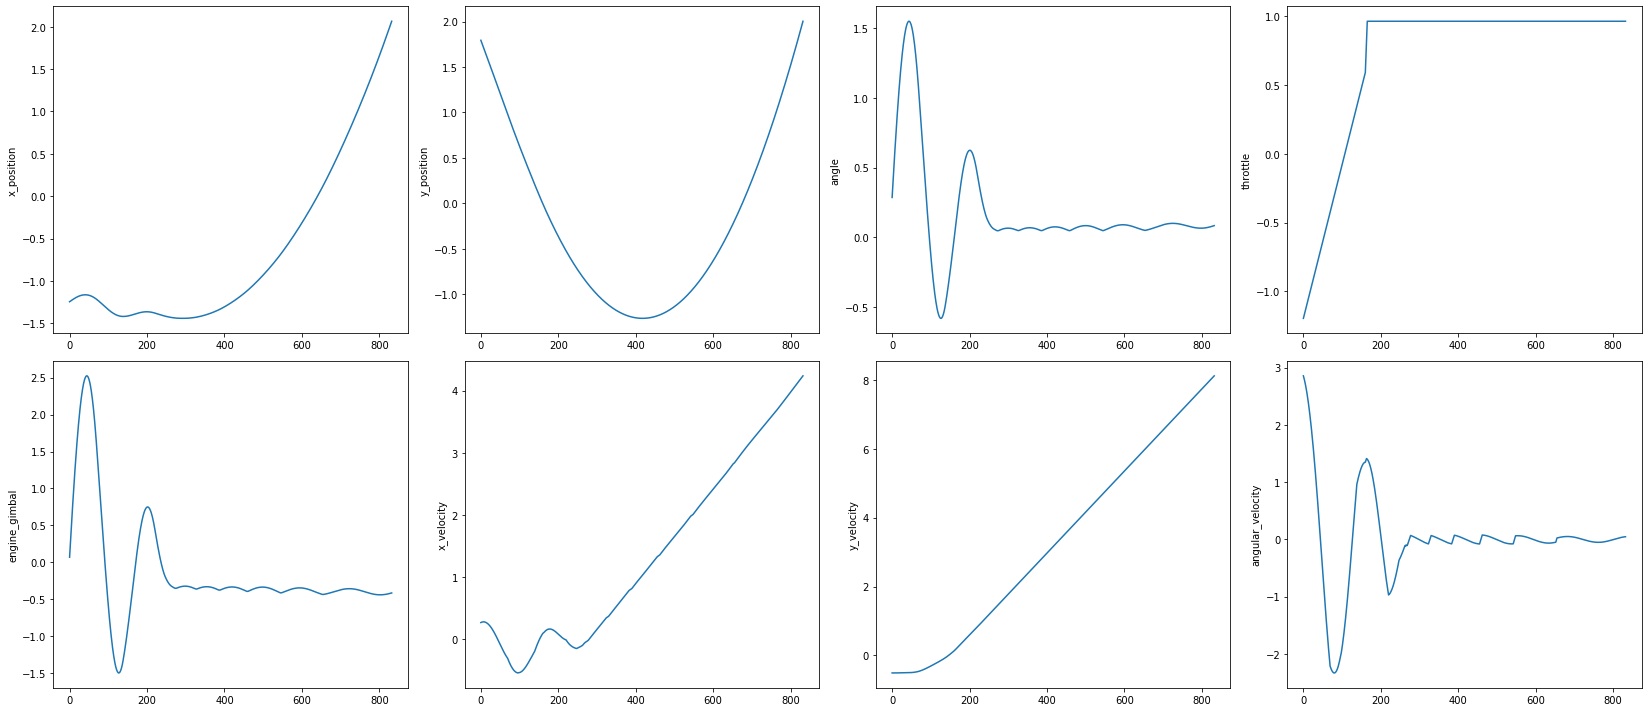

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=[23,10])
for i, column in enumerate(draw_cols):
    sns.lineplot(x = draw_df.index,
                 y = draw_df[column],
                 ax=axes[i//4,i%4])
plt.tight_layout()